<a href="https://colab.research.google.com/github/dandyraa/Capstone-2/blob/main/Capstone%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Background**

New York City Taxi and Limousine Commision adalah lembaga pemerintah Kota New York yang didirikan pada tahun 1971 dan bertugas memberikan lisensi dan mengatur industri Taksi Medallion (Taksi yang berwarna kuning) serta kendaraan sewaan (seperi mobil hitam atau limusin), termasuk perusahaan berbasis aplikasi seperti Uber dan Lyft.

Salah satu partner bisnis atau vendor yang bekerja sama dengan NYC TLC adalah VeriFone Inc., dimana perusahaan ini salah satu penyedia layanan Taksi Medallion di New York City. Perusahaan ini memfasilitasi pencatatan data dan administrasi setiap trip taxi yang berada di kota tersebut.

### **Problem Overview**

VeriFone Inc. ingin meningkatkan profit perusahaan mereka dengan cara mengetahui lokasi-lokasi yang *profitable* dan ramai sehingga memiliki kemungkinan lebih banyak pengguna atau pelanggan. Informasi ini dapat membantu VeriFone Inc. untuk meningkatkan ketepatan dan efektifitas mereka dalam menempatkan unit-unit taksi di area tersebut.

# Data

Kita akan melakukan analisa berdasarkan data yang tersedia untuk dapat memberikan rekomendasi terbaik kepada VeriFone Inc. agar perusahaan mereka dapat meningkatkan profit.

Sumber Data : New York City TLC Trip Record

Dataset dapat diakses [disini.](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from matplotlib import cm
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency, normaltest, mannwhitneyu, ttest_ind, f_oneway
from sklearn.feature_selection import f_classif
from datetime import datetime
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings("ignore")

style.use('fivethirtyeight')

Dataset New York City TLC Trip Record Dictionary.

Terdapat 17 Kolom pada dataset tersebut, yaitu :
1.   **VendorID** = Kode vendor yang bekerjasama dengan New York City TLC.
    *   1 = CreativeMobileTechnologies,LLC.
    *   2 = VeriFone Inc.
2. p**ep_pickup_datetime** = tanggal dan waktu penjemputan atau pick up (ketika taximeter dinyalakan)
3. **lpep_dropoff_datetime** = tanggal dan waktu menurunkan penumpang atau drop off (ketika taximeter dimatikan)
4. **Passenger_count** = jumlah penumpang didalam kendaraan
5. **Trip_distance** = jarak tempuh perjalanan yang dihitung menggunakan taximeter selama perjalanan berlangsung (satuan mil)
6. **PULocationID** = Lokasi penjemputan atau pick up (ketika taximeter dinyalakan)
7. **DOLocationID** = Lokasi penurunan atau drop off (ketika taximeter dimatikan)
8. **RateCodeID** =
    *   1 = Tarif Standar
    *   2 = JFK (Kode tarif untuk perjalanan dari atau ke Bandara JFK)
    *   3 = Newark (Kode tarif untuk perjalanan dari atau ke Bandara Newark Liberty)
    *   4 = Nassau or Westchester (Kode tarif untuk perjalanan dari atau ke Nassau atau Westchester)
    *   5 = Tarif yang ditawar
    *   6 = Perjalanan Kelompok
9. **Store_and_fwd_flag** =
    *   Y = Catatan perjalanan disimpan pada perangkat memori kendaraan dan kemudian dikirim ke server ('trip store and forward')
    *   N = Catatn perjalanan langsung dikirim ke server tanpa disimpan pada perangkat memori kendaraan ( bukan 'trip store and forward')
10. **Payment_type** =
    *   1 = Kartu kredit
    *   2 = Tunai
    *   3 = Tidak membayar
    *   4 = *Dispute*
    *   5 = Tidak diketahui
    *   6 = Perjalanan dibatalkan
11. **Fare_amount** = Jumlah tarif penumpang yang dihitung berdasarkan waktu dan jarak tempuh serta biaya tambahan seperti biaya pajak MTA sebesar $0.50 atau  $1 pada jam sibuk maupun jam tengah malam (overnight)
12. **MTA_tax** = Biaya tambahan yang dikenakan untuk mendukung layanan transportasi umum di daerah metropolitan Kota New York. Biaya tambahan ini dikenakan pada setiap perjalanan taksi yang dilakukan di Kota New York
13. **Improvement_surcharge** = Biaya tambahan sebesar $0.30 yang dikenakan pada perjalanan taksi yang tipe tripnya secara langsung memanggil taksi dipinggir jalan (*street-hail*)
14. **Tip_amount** = Jumlah tip/bonus yang diberikan oleh penumpang
15. **Tolls_amount** = Jumlah biaya jalut cepat (*toll*) yang harus dibayarkan penumpang
16. **Total_amount** = Jumlah total biaya yang harus dibayar penumpang selama perjalanan taksi (tidak termasuk tips/bonus)
17. **Trip_type** =
    *   1 = *Street-hail*. Trip dengan cara secara langsung memanggil taksi di pinggir jalan seperti melambaikan tangan tanpa memesan terlebih dahulu ke kantor pusat taksi
    *   6 = *Dispatch*. Trip dengan cara memesan terlebih dahulu ke kantor pusat taksi.


Berikut adalah **5 baris teratas dan terbawah** dari dataset **New York City TLC Trip Record**:

In [3]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding and Cleaning

Langkah pertama dalam menganalisa sebuah data adalah memahami dan melakukan pembersihan pada data tersebut. Kita dapat mengetahui anomali-anomali apa saja yang terdapat di dalam dataset. Setiap penanganan anomali akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowladge* maupun secara statistik.

Berikut adalah informasi umum dari dataset:

In [4]:
print(f'Jumlah baris dan kolom didataset NYC TLC Trip Record adalah {df.shape}')
df.info()

Jumlah baris dan kolom didataset NYC TLC Trip Record adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-n

Agar lebih mudah untuk melihat informasi dataset secara umum, lakukanlah transpose dataset dari kolom menjadi baris untuk melihat secara keseluruhan isi dari setiap kolom.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.863028,0.343820,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.117160,1.372913,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.549735,61.244314,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.429901,76.761311,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.825431,1.269904,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.588340,0.385819,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22


In [6]:
df.describe(include=[object]).T

,count,unique,top,freq
lpep_pickup_datetime,68211,66575,2023-01-09 09:08:00,4
lpep_dropoff_datetime,68211,66519,2023-01-09 00:00:00,6
store_and_fwd_flag,63887,2,N,63579


In [7]:
pd.set_option('display.max_colwidth',-1)

# Melihat isi kolom secara keseluruhan

isi_list = []
for kolom in df.columns:
  isi_list.append([kolom, df[kolom].nunique(), df[kolom].unique()])

desctable = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Data Unik', 'Isi Kolom'],
                         data = isi_list)
desctable

,Nama Kolom,Jumlah Data Unik,Isi Kolom
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2023-0

Jika kita melihat hasil tampilan dataset diatas, kita akan melihat kolom **extra**, **ehail_fee**, dan **congestion_surcharge**. Berdasarkan dictionary yang kita buat sebelumnya, kolom-kolom tersebut tidak ada, sehingga dapat kita hapus karena tidak akan kita gunakan pada proses analisa.

In [9]:
# Menghapus kolom
df = df.drop(['extra', 'ehail_fee', 'congestion_surcharge'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  mta_tax                68211 non-null  float64
 11  tip_amount             68211 non-null  float64
 12  tolls_amount           68211 non-null  float64
 13  improvement_surcharge  68211 non-null  float64
 14  total_amount           68211 non-null  float64
 15  pa

Selanjutnya, kita akan melakukan filter untuk data dari vendor VeriFone Inc. dengan memilih VendorID = 2 karena kita akan fokus pada data vendor tersebut.

In [11]:
# Filter kolom VendorID
df = df[df['VendorID']==2]

# Menghapus Kolom Vendor karena sekarang kita hanya memiliki satu jenis vendor di dataset
df = df.drop(['VendorID'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58868 entries, 0 to 68210
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   58868 non-null  object 
 1   lpep_dropoff_datetime  58868 non-null  object 
 2   store_and_fwd_flag     54672 non-null  object 
 3   RatecodeID             54672 non-null  float64
 4   PULocationID           58868 non-null  int64  
 5   DOLocationID           58868 non-null  int64  
 6   passenger_count        54672 non-null  float64
 7   trip_distance          58868 non-null  float64
 8   fare_amount            58868 non-null  float64
 9   mta_tax                58868 non-null  float64
 10  tip_amount             58868 non-null  float64
 11  tolls_amount           58868 non-null  float64
 12  improvement_surcharge  58868 non-null  float64
 13  total_amount           58868 non-null  float64
 14  payment_type           54672 non-null  float64
 15  tr

Dataset sudah sesuai dengan kebutuhaan.
Selanjutnya, cek apakah terdapat data duplikat pada dataset



In [13]:
df.duplicated().value_counts()

False    58868
dtype: int64

Tidak terdapat data yang memiliki duplikat.
Jumlah data unik adalah 58868

Selanjutnya, terdapat kolom **lpep_pickup_datetime** dan **lpep_dropoff_datetime** yang berisi informasi berupa tanggal dan waktu. Cek apakah tipe data pada kolom tersebut sudah berupa datetime. Apabila belum, ubah data menjadi format datetime dan cek informasi data kembali.

In [14]:
# Cek tipe data
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58868 entries, 0 to 68210
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   lpep_pickup_datetime   58868 non-null  object
 1   lpep_dropoff_datetime  58868 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


Data pada kolom tersebut masih berupa teks dan belum berupa datetime.
Ubah tipe data pada kolom tersebut.

In [15]:
# Mengubah tipe data menjadi datetime
df['lpep_pickup_datetime']=pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime']=pd.to_datetime(df['lpep_dropoff_datetime'])

In [16]:
# Cek kembali informasi data
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58868 entries, 0 to 68210
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   58868 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  58868 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.3 MB


Data pada kolom tersebut telah berubah format menjadi datetime!

## Missing Value

Langkah selanjutnya adalah melihat apakah terdapat missing value pada dataset yang kita gunakan.

In [17]:
df.isna().sum()

lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4196
RatecodeID               4196
PULocationID             0   
DOLocationID             0   
passenger_count          4196
trip_distance            0   
fare_amount              0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4196
trip_type                4196
dtype: int64

In [18]:
df.isna().sum()/df.shape[0]*100

lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       7.127811
RatecodeID               7.127811
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          7.127811
trip_distance            0.000000
fare_amount              0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             7.127811
trip_type                7.127811
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x400 with 0 Axes>

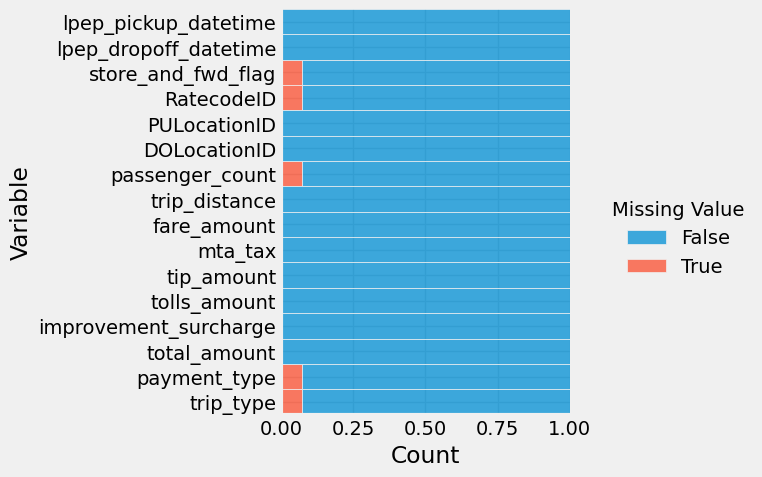

In [20]:
# Melihat missing value menggunakan seaborn sebagai bentuk visualisasi
plt.figure(figsize=(10,4))
mv = sns.displot(
    data=df.isna().melt(value_name="Missing Value"),
    y="variable",
    hue="Missing Value",
    multiple="fill",
    aspect=1.25
)

mv.set(ylabel="Variable")
plt.show

<Axes: >

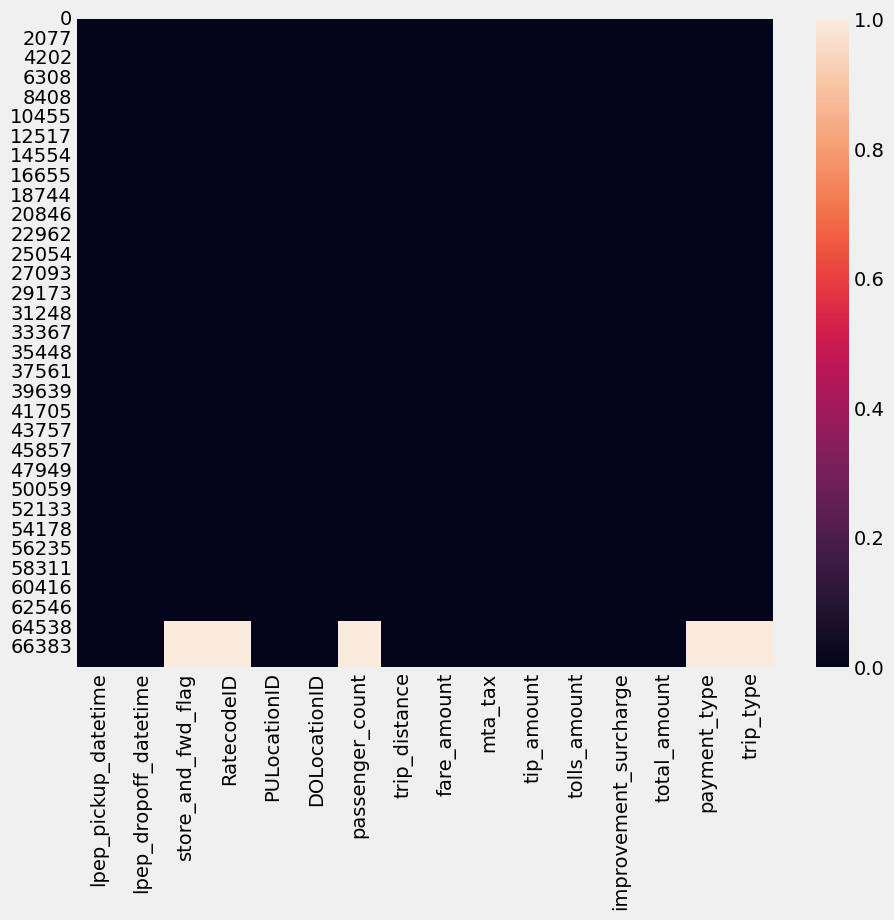

In [21]:
# Melihat sebaran Missing Value masing-masing  kolom secara lebih detil
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())

<Axes: >

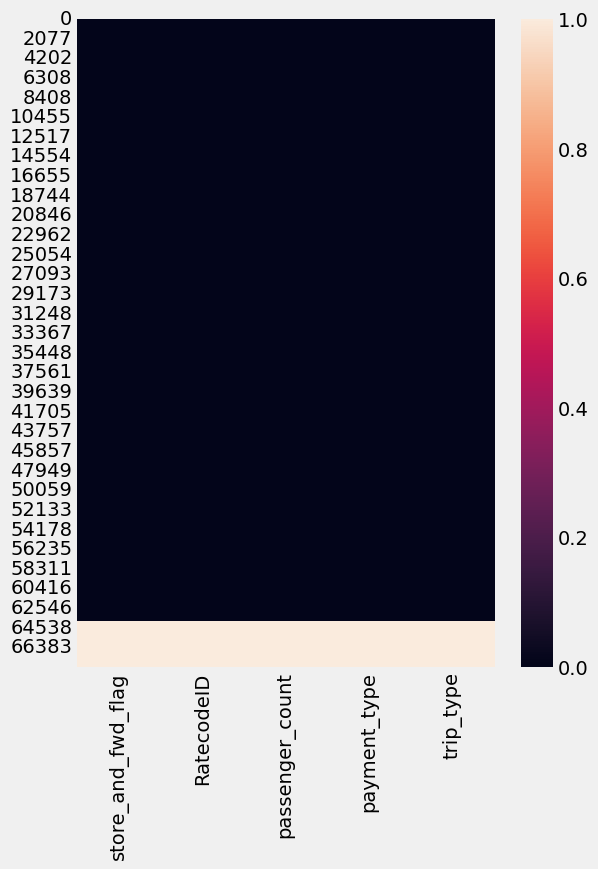

In [23]:
# Melihat 5 kolom yang memiliki Missing Valiue
plt.figure(figsize=(6,8))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','payment_type','trip_type']].isna())

Terdapat dua cara yang dapat dilakukan untuk menangani Missing Value, yaitu:
1.   **Menghapus Baris atau Kolom yang berisikan Missing Value**

     Cara ini dapat digunakan apabila proporsi Missing Value tergolong sedikit sehingga kemungkinan tidak akan terlalu berpengaruh terhadap proses analisis data. Jika proporsi Missing Value relatif kecil dibandingkan dengan ukuran dataset, penghapusan Missing Value dapat meningkatkan akurasi analisa data.
2.   **Mengisi Missing Value**

     Cara ini dapat digunakan jika proporsi Missing Value besar.
     
     Terdapat beberapa metode yang dapat dilakukan untuk mengisi Missing Value, yaitu:   

     *   Mengisi data yang hilang dengan nilai sebenarnya atau seaktual mungkin.
     *   Mengisi dengan angka mean, median, atau modus adalah opsi lainnya.


Karena proporsi Missing Value pada datset yang kita gunakan cukup kecil (sekitar 7% untuk setiap kolom yang terdapat Missing Value), maka kita dapat menghapus set data yang Missing Value





In [24]:
# Menghapus data Missing Value
df = df.dropna(axis=0)

In [25]:
# Cek informasi data terbaru mengenai Missing Value
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

Dataset sudah tidak memiliki Missing Value.

## Merubah tipe data menjadi *Category*

### RatecodeID

In [26]:
# Mengubah tipe data RatecodeID menjadi category

df['RatecodeID'] = df['RatecodeID'].replace({1:'Tarif Standar', 2:'JFK', 3:'Newark', 4:'Nassau or Westchester', 5:'Tarif yang ditawar', 6:'Perjalanan Kelompok'})
df['RatecodeID'].value_counts()

Tarif Standar            53001
Tarif yang ditawar       1451 
JFK                      144  
Nassau or Westchester    50   
Newark                   26   
Name: RatecodeID, dtype: int64

### payement_type

In [27]:
# Mengubah tipe data payment_type menjadi category

df['payment_type'] = df['payment_type'].replace({1:'Kartu Kredit', 2:'Tunai', 3:'Tidak membayar', 4:'Dispute', 5:'Tidak diketahui', 6:'Perjalanan dibatalkan'})
df['payment_type'].value_counts()

Kartu Kredit      34572
Tunai             19758
Tidak membayar    278  
Dispute           64   
Name: payment_type, dtype: int64

### trip_type

In [28]:
# Mengubah tipe data trip_type menjadi category

df['trip_type'] = df['trip_type'].replace({1:'Street-hail', 2:'Dispatch'})
df['trip_type'].value_counts()

Street-hail    53332
Dispatch       1340 
Name: trip_type, dtype: int64

## Clean Data

In [30]:
# Cek kolom dengan tipe category pada dataset

column_category = [column for column in df.columns if df[column].dtype == "object"]
column_category

['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type']

In [32]:
# Cek jumlah kolom pada dataset

total_column = [column for column in df.columns if df[column].dtype == "float64"] + [column for column in df.columns if df[column].dtype == "int64"]
total_column

['passenger_count',
 'trip_distance',
 'fare_amount',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'PULocationID',
 'DOLocationID']

In [33]:
display(df.head(),df.tail())

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Tarif Standar,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,Kartu Kredit,Street-hail
1,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Tarif Standar,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,Kartu Kredit,Street-hail
2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Tarif Standar,223,179,1.0,0.00,7.2,0.5,1.94,0.0,1.0,11.64,Kartu Kredit,Street-hail
5,2023-01-01 00:53:31,2023-01-01 01:11:04,N,Tarif Standar,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,Tunai,Street-hail
7,2023-01-01 00:11:58,2023-01-01 00:24:55,N,Tarif Standar,24,75,1.0,1.88,14.2,0.5,0.00,0.0,1.0,16.70,Tunai,Street-hail


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
63882,2023-01-31 23:09:22,2023-01-31 23:17:21,N,Tarif yang ditawar,130,205,1.0,2.75,15.0,0.0,2.00,0.0,0.3,17.30,Kartu Kredit,Dispatch
63883,2023-01-31 23:06:18,2023-01-31 23:17:03,N,Tarif Standar,65,181,1.0,2.44,13.5,0.5,3.20,0.0,1.0,19.20,Kartu Kredit,Street-hail
63884,2023-01-31 23:17:03,2023-01-31 23:23:04,N,Tarif Standar,244,116,1.0,1.40,9.3,0.5,2.36,0.0,1.0,14.16,Kartu Kredit,Street-hail
63885,2023-01-31 23:29:18,2023-01-31 23:38:50,N,Tarif Standar,74,238,1.0,2.47,13.5,0.5,3.75,0.0,1.0,22.50,Kartu Kredit,Street-hail
63886,2023-01-31 23:00:12,2023-01-31 23:10:08,N,Tarif Standar,95,95,1.0,1.39,11.4,0.5,4.17,0.0,1.0,18.07,Kartu Kredit,Street-hail


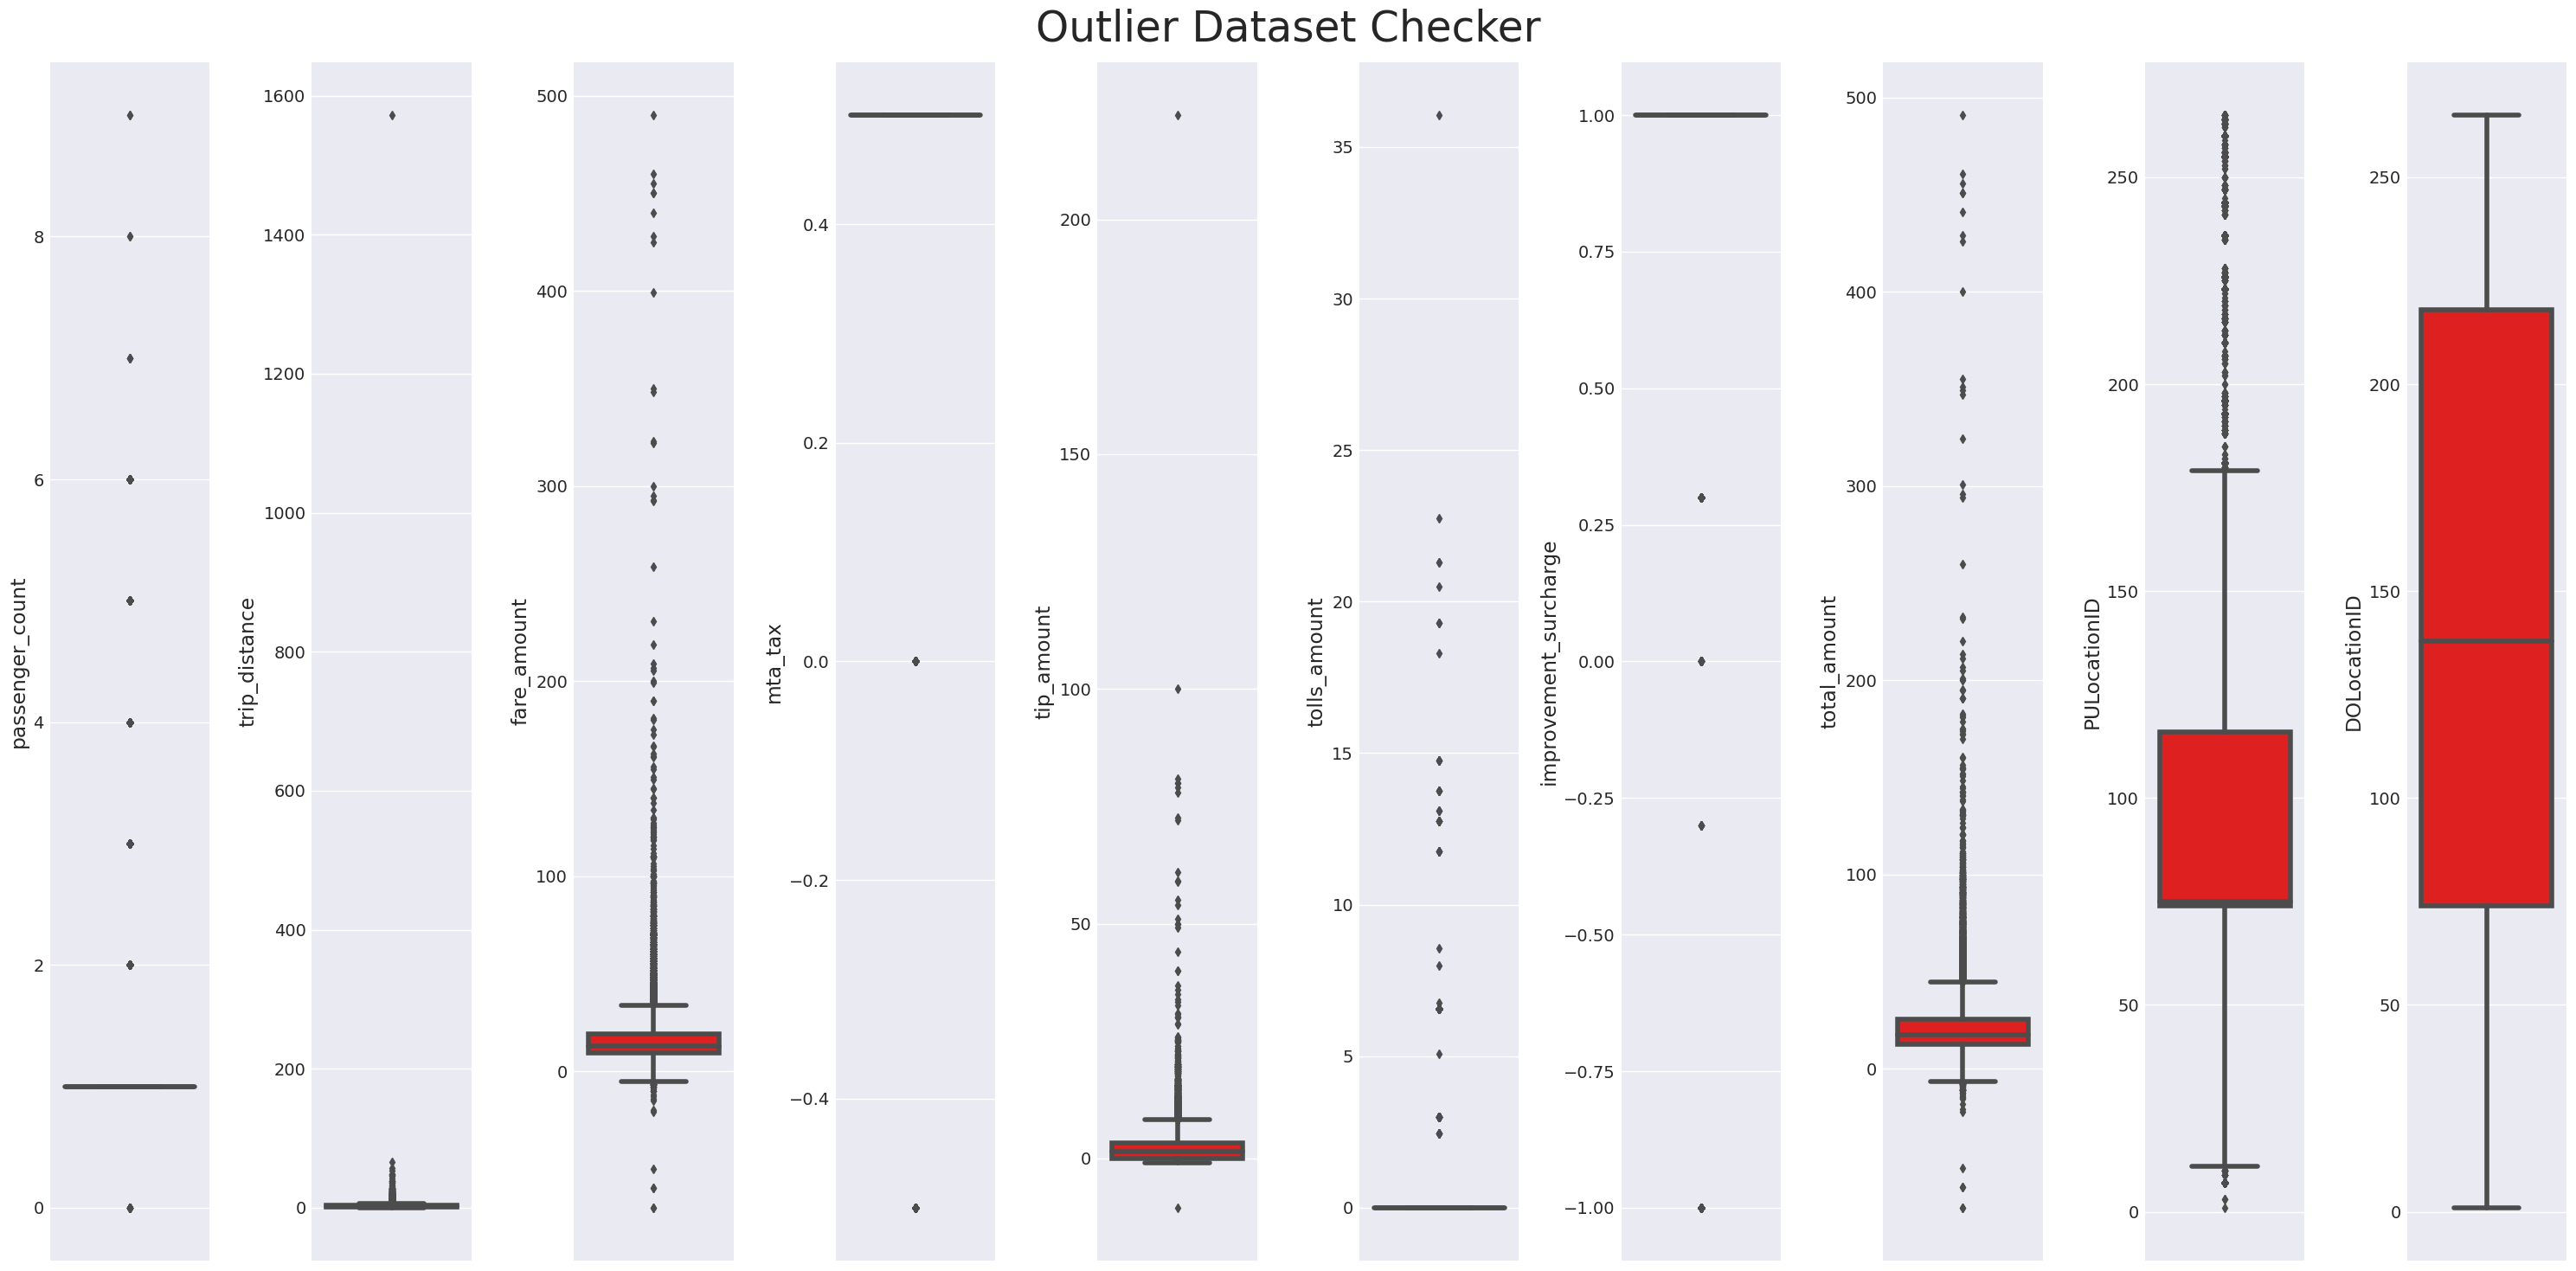

In [34]:
# Cek Outlier atau Pencilan

sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(30,15))
fig.suptitle('Outlier Dataset Checker', fontsize=35)

for i in range (0, len(total_column)):
  plt.subplot(1, len(total_column), i+1)
  sns.boxplot(y=df[total_column[i]], color = 'red', orient = 'v')
  plt.tight_layout()

Kolom yang tidak memiliki outlier/pencilan hanya **DOLocationID** dan **PULocationID**.

Dapat disimpulkan bahwa dataset yang kita gunakan tidak  berdistribusi normal.

Data telah bersih!
Selanjutnya, export dataset ke dalam bentuk file Excel untuk digunakan pada proses visualisasi data.

In [151]:
df.to_excel('NYC TLC Trip Record 1.xlsx', index=False)

# Data Analysis


Proses pemahaman dan pembersihan data telah dilakukan.

Selanjutnya, lakukanlah analisis data untuk mendapatkan hasil rekomendasi berdasarkan tujuan yang ingin dicapai oleh VeriFone Inc. yaitu **meningkatkan profit perusahaan dan meningkatkan efektifitas lokasi pickup yang profitable.**

Cek apakah terdapat anomali pada dataset tersebut seperti hal yang tidak sesuai atau tidak mungkin dengan domain knowledge yang ada.

## Amount Total Analysisi (Null Amount)

In [36]:
totalAmountMinus = df[df['total_amount']<0]
print(len(totalAmountMinus))
print(len(totalAmountMinus)/len(df)*100)

174
0.3182616330114135


Terdapat 174 data total amount yang minus.
Secara umum, seorang pengemudi taksi tidaklah mungkin menerima bayaran yang minus ketika melakukan suatu pengantaran. Jadi, hal ini mengindikasikan adanya anomali data pada kolom total_amount.

In [37]:
df['payment_type'].value_counts()

Kartu Kredit      34572
Tunai             19758
Tidak membayar    278  
Dispute           64   
Name: payment_type, dtype: int64

In [38]:
totalAmountMinus['payment_type'].value_counts()

Tidak membayar    139
Dispute           32 
Tunai             3  
Name: payment_type, dtype: int64

Proses pengantaran yang memiliki bayaran minus terbagi kedalam 3 metode pembayaran atau payment_type, yaitu:
1.   Tidak membayar : 139 data
2.   Dispute : 32 data
3.   Tunai : 3 data



## Passenger Location Analysis



In [43]:
# Menentukan 5 lokasi penjemputan/pick up yang teramai

df_lokasipenumpang = df['PULocationID'].value_counts().reset_index().rename(columns={'index':'PULocationID','PULocationID':'count'})
df_lokasipenumpang.head()

,PULocationID,count
0,74,10565
1,75,7679
2,95,3725
3,41,3341
4,166,3189


In [44]:
# Banyak data lokasi penjemputan/pick up

len(df_lokasipenumpang)

188

Asumsikan jika jumlah trip minimal yang ditargetkan untuk setiap lokasi adalah 15 trip. Untuk lokasi-lokasi yang memiliki jumlah trip dibawah 15 trip akan dianggap lokasi yang tidak profitable.

In [45]:
# Cek lokasi yang memiliki jumlah trip dibawah 15 trip

dfLokasiunprofit = df_lokasipenumpang[df_lokasipenumpang['count']<15]
dfLokasiunprofit = dfLokasiunprofit.groupby('count').count().reset_index().sort_values('PULocationID', ascending=False)
dfLokasiunprofit['count'] = dfLokasiunprofit['count'].astype(str)
dfLokasiunprofit

,count,PULocationID
0,1,18
1,2,15
4,5,11
3,4,10
5,6,9
2,3,8
6,7,5
7,8,5
8,9,5
9,10,5


In [46]:
# Filter lokasi yang memiliki trip lebih dari 15 trip untuk meningkatkan profit

df_lokasipenumpang['PULocationID'][df_lokasipenumpang['count']>=15].sum()

11494

In [51]:
lok_unprofit = df_lokasipenumpang['PULocationID'][df_lokasipenumpang['count']<15].count()
lok_profit = df_lokasipenumpang['PULocationID'][df_lokasipenumpang['count']>=15].count()

df_lokasipenumpang_all = pd.DataFrame({
    'location' : ['< 15 trip','>= 15 trip'],
    'count' : [lok_unprofit, lok_profit]
})

In [52]:
df_lokasipenumpang_all

,location,count
0,< 15 trip,103
1,>= 15 trip,85


<function matplotlib.pyplot.show(close=None, block=None)>

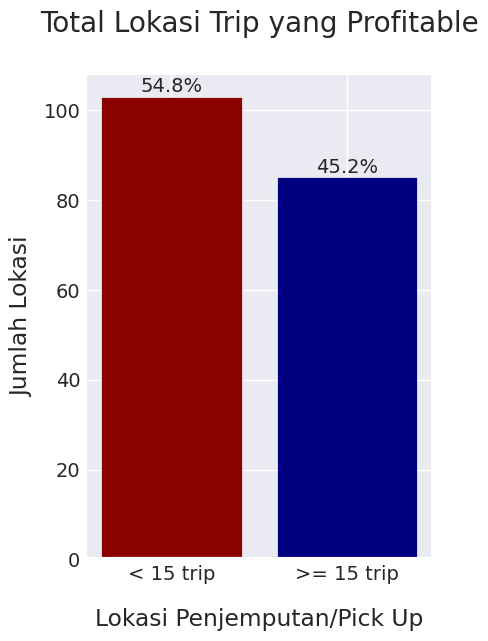

In [53]:
sns.set_style('darkgrid')
colors = ['#8b0000','#000080']

plt.figure(figsize=(4,6))
plt.title('Total Lokasi Trip yang Profitable', pad = 30)
plt.xlabel('Lokasi Penjemputan/Pick Up', labelpad = 20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah Lokasi', labelpad=20)
plt.gca().yaxis.set_label_coords(-0.15, 0.5)

plt.bar(df_lokasipenumpang_all['location'], df_lokasipenumpang_all['count'], color = colors)

total = sum(df_lokasipenumpang_all['count'])
for i, v in enumerate(df_lokasipenumpang_all['count']):
  percent = v / total * 100
  plt.text(i, v + 1, f'{percent:.1f}%', ha='center')

plt.show

Berdasarkan data, total lokasi trip yang tidak profitable atau memiliki jumlah pick up kurang dari 15 sebesar 54.8% dengan jumlah 103 lokasi.

In [54]:
# Total Lokasi penjemputan atau pick up
df['PULocationID'].nunique()

188

In [55]:
# Total Lokasi penurunan atau drop off

df['DOLocationID'].nunique()

245

Tujuan utama dari VeriFone Inc. adalah meningkatkan profit. Oleh karena itu, kita dapat fokus kepada 10 lokasi teramai atau Top 10 Profitable Location.

In [57]:
df_top10 = df['PULocationID'].value_counts().head(10).reset_index().rename(columns={'index':'PULocationID','PULocationID':'count'})
df_top10['PULocationID'] = df_top10['PULocationID'].astype(str)
df_top10

,PULocationID,count
0,74,10565
1,75,7679
2,95,3725
3,41,3341
4,166,3189
5,82,2644
6,43,2638
7,97,1847
8,7,1708
9,42,1304


In [58]:
df['PULocationID'].value_counts().reset_index().rename(columns={'index':'PULocationID','PULocationID':'count'}).sum()

PULocationID    24838
count           54672
dtype: int64

In [59]:
df_top10['count'].sum()

38640

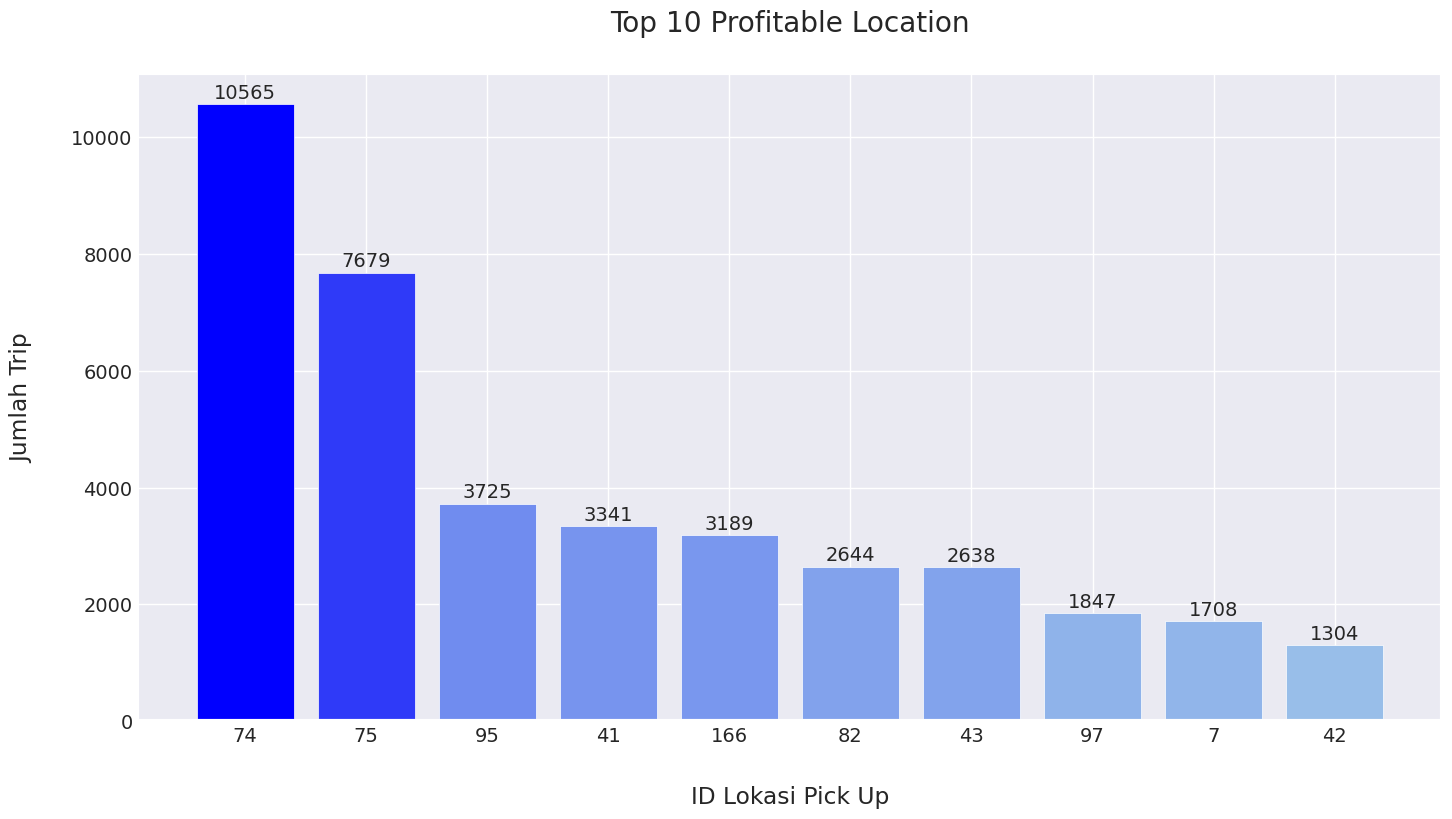

In [60]:
sns.set_style('darkgrid')
normalized_heights = np.array(df_top10['count'])/max(df_top10['count'])
color_start = 'lightblue'
color_end = 'blue'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize=(15,8))
plt.title('Top 10 Profitable Location', pad = 30)
plt.xlabel('ID Lokasi Pick Up', labelpad = 20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah Trip', labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.bar(df_top10['PULocationID'], df_top10['count'], color = cmap(normalized_heights))

for i, value in enumerate(df_top10['count']):
  plt.text(i, value + 100, str(value), ha='center')

plt.show()

**Hasil Analisa** :

Lokasi dengan ID 74 merupakan lokasi dengan trip terbanyak.

Menempatkan lebih banyak unit taksi pada lokasi tersebut akan meningkatkan efektifitas trip sehingga perusahaan akan mendapatkan profit yang lebih maksimal.

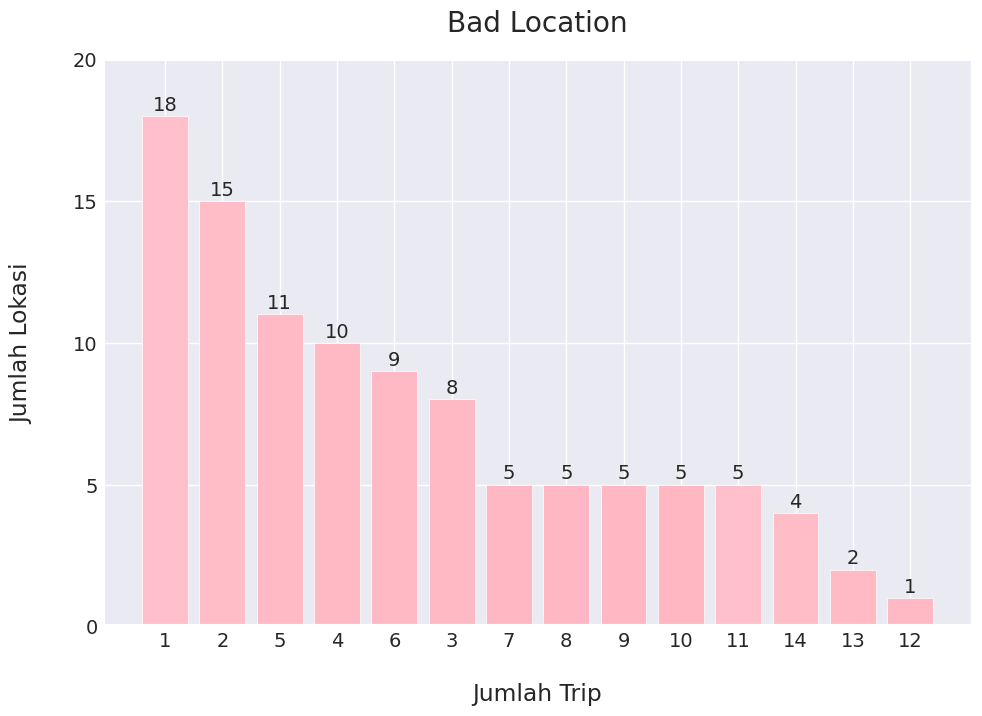

In [65]:
sns.set_style('darkgrid')

normalized_heights = np.array(df_top10['count'])/max(df_top10['count'])
color_start = 'lightpink'
color_end = 'pink'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize=(10,7))
plt.title('Bad Location', pad = 20)

plt.xlabel('Jumlah Trip', labelpad = 20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah Lokasi', labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.bar(dfLokasiunprofit['count'], dfLokasiunprofit['PULocationID'], color = cmap(normalized_heights))
plt.ylim(0,20)
plt.yticks(range(0,21,5))

for i, value in enumerate(dfLokasiunprofit['PULocationID']):
  plt.text(i, value + 0.2, str(value), ha='center')

plt.show()

**Hasil Analisa** :

Terdapat 18 lokasi yang hanya memiliki 1 trip.

Menempatkan lebih sedikit unit taksi pada lokasi tersebut akan meningkatkan efektifitas trip sehingga perusahaan akan mendapatkan profit yang lebih maksimal.

## Trip Type Analysis

In [66]:
df_tipetrip = df['trip_type'].value_counts().reset_index().rename(columns={'index':'trip_type','trip_type':'count'})
df_tipetrip

,trip_type,count
0,Street-hail,53332
1,Dispatch,1340


<function matplotlib.pyplot.show(close=None, block=None)>

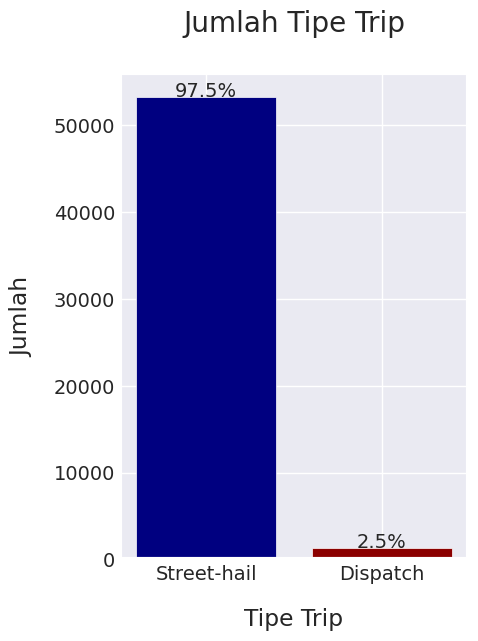

In [73]:
sns.set_style('darkgrid')
colors = ['#000080','#8b0000']

plt.figure(figsize=(4,6))
plt.title('Jumlah Tipe Trip', pad = 30)
plt.xlabel('Tipe Trip', labelpad = 20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah', labelpad=20)
plt.gca().yaxis.set_label_coords(-0.25, 0.5)

plt.bar(df_tipetrip['trip_type'], df_tipetrip['count'], color = colors)

total = sum(df_tipetrip['count'])
for i, v in enumerate(df_tipetrip['count']):
  percent = v / total * 100
  plt.text(i, v + 1, f'{percent:.1f}%', ha='center')

plt.show

**Hasil Analisa** :

Tipe trip Street-hail mejadi tipe trip yang lebih banyak digunakan dengan perbandingan yang sangat jauh dengan tipe trip Dispatch. Tipe trip Dispatch kurang diminati atau belum mampu  meng-capture penumpang lebih banyak.

VeriFone Inc. harus membuat inovasi yang dapat mempromosikan tipe trip Dispatch lebih baik, sehingga tipe trip Dispatch juga banyak diminati penumpang dan dapat seimbang dengan tipe trip Street-hail. Hal ini sangat direkomendasikan, terlebih banyaknya taksi online yang hadir di era modern seperti saat ini.

## Distance Trip Analysis

In [68]:
jaraktrip0 = df[df['trip_distance'] == 0]
len(jaraktrip0)

1709

In [69]:
jaraktrip0.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Tarif Standar,223,179,1.0,0.0,7.2,0.5,1.94,0.0,1.0,11.64,Kartu Kredit,Street-hail
58,2023-01-01 00:57:15,2023-01-01 01:00:15,N,Tarif Standar,75,75,1.0,0.0,4.4,0.5,1.38,0.0,1.0,8.28,Kartu Kredit,Street-hail
99,2023-01-01 01:27:36,2023-01-01 01:27:43,N,Tarif yang ditawar,168,168,0.0,0.0,20.0,0.0,0.00,0.0,1.0,21.00,Kartu Kredit,Dispatch
107,2023-01-01 01:11:13,2023-01-01 01:11:36,N,Tarif Standar,7,7,1.0,0.0,3.0,0.5,9.00,0.0,1.0,14.50,Kartu Kredit,Street-hail
115,2023-01-01 01:52:58,2023-01-01 01:53:00,N,Tarif Standar,264,264,1.0,0.0,3.0,0.5,21.50,0.0,0.3,26.30,Kartu Kredit,Street-hail


In [70]:
len(df)

54672

In [75]:
df_jaraktrip0 = pd.DataFrame({
    'Trip_distance' : ['Trip Distance 0', 'Normal Distance'],
    'count' : [len(jaraktrip0),len(df)]
})
df_jaraktrip0

,Trip_distance,count
0,Trip Distance 0,1709
1,Normal Distance,54672


<function matplotlib.pyplot.show(close=None, block=None)>

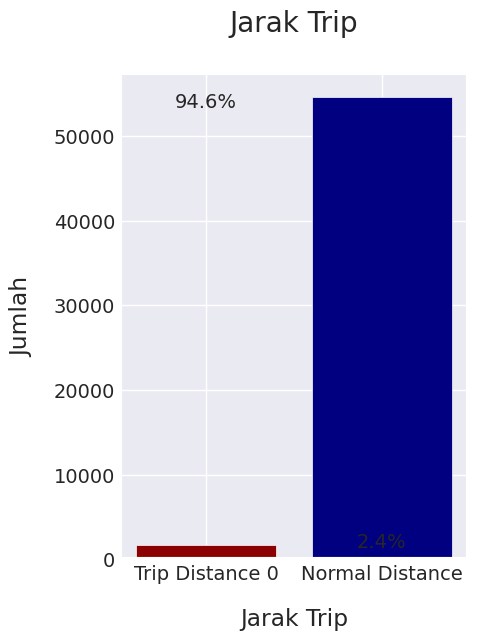

In [76]:
sns.set_style('darkgrid')
colors = ['#8b0000','#000080']

plt.figure(figsize=(4,6))
plt.title('Jarak Trip', pad = 30)
plt.xlabel('Jarak Trip', labelpad = 20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah', labelpad=20)
plt.gca().yaxis.set_label_coords(-0.25, 0.5)

plt.bar(df_jaraktrip0['Trip_distance'], df_jaraktrip0['count'], color = colors)

total = sum(df_jaraktrip0['count'])
for i, v in enumerate(df_tipetrip['count']):
  percent = v / total * 100
  plt.text(i, v + 1, f'{percent:.1f}%', ha='center')

plt.show

**Hasil Analisa** :

Terdapat data anomali terkait jarak trip dimana jarak tripnya sebesar 0 mil.

Hal yang harus dilakukan adalah melakukan pengecekan secara berkala terkait unit taksi termasuk taximeter yang terdapat pada setiap unit taksi. Data anomali diatas dapat disebabkan rusaknya alat pengukur.

## Trip Time Analysis

In [148]:
from datetime import datetime

df['day'] = pd.to_datetime(df['lpep_dropoff_datetime']).apply(lambda x : datetime.strftime(x,'%A'))

In [149]:
# Cek hari paling ramai atau memiliki jumlah trip tertinggi

df_hari = df['day'].value_counts().reset_index().rename(columns = {'index':'Day','day':'Count'})
df_hari

,Day,Count
0,Tuesday,8992
1,Thursday,8086
2,Friday,7996
3,Wednesday,7989
4,Monday,7915
5,Saturday,6933
6,Sunday,6761


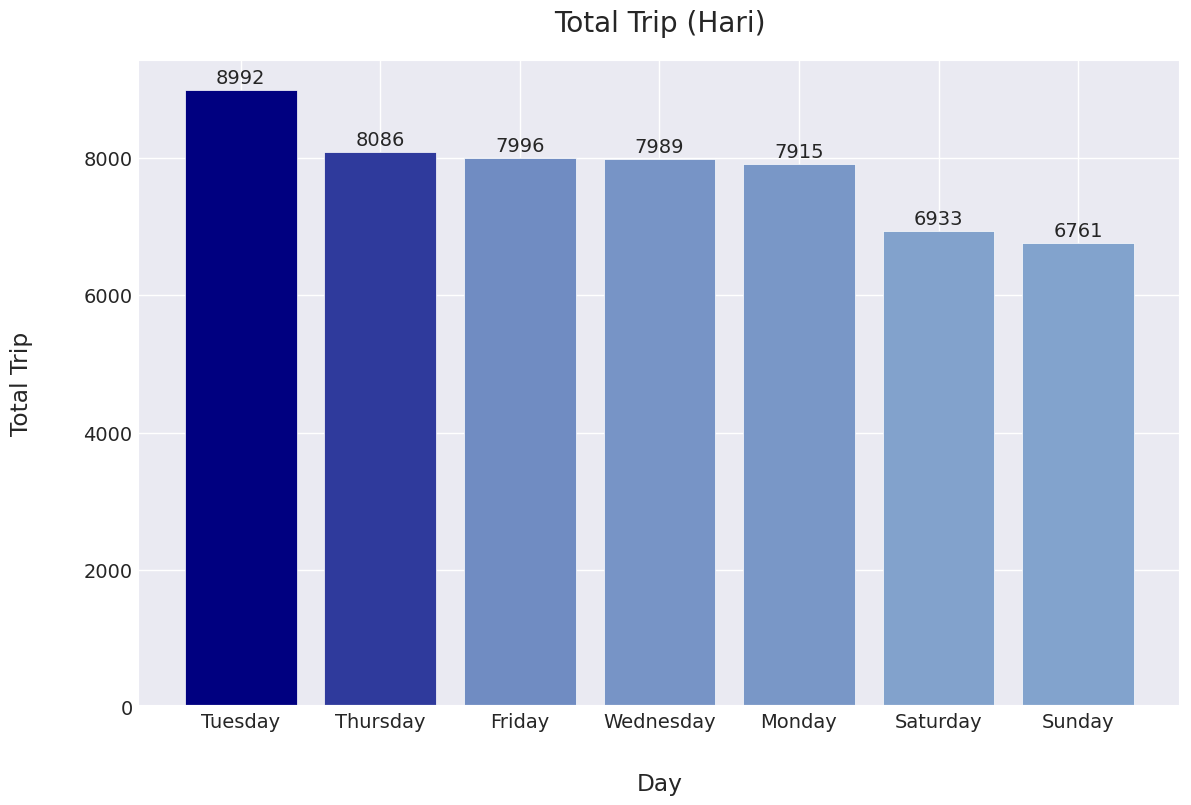

In [150]:
sns.set_style('darkgrid')

normalized_heights = np.array(df_top10['count'])/max(df_top10['count'])
color_start = 'lightblue'
color_end = 'navy'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize=(12,8))
plt.title('Total Trip (Hari)', pad = 20)
plt.xlabel('Day', labelpad = 20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip', labelpad=20)
plt.gca().yaxis.set_label_coords(-0.1, 0.5)

plt.bar(df_hari['Day'], df_hari['Count'], color = cmap(normalized_heights))

for i, value in enumerate(df_hari['Count']):
  plt.text(i, value + 100, str(value), ha='center')

plt.show()

Berdasarkan visualisasi diatas, **Hari Selasa adalah hari paling ramai atau hari dengan jumlah trip terbanyak**





In [110]:
# Cek jam paling ramai atau memiliki jumlah trip tertinggi

df['hour'] = df['lpep_dropoff_datetime'].dt.hour
df_jam = df['hour'].value_counts().reset_index().rename(columns = {'index':'Hour','hour':'count'}).sort_values('Hour',ascending=False)
df_jam = df_jam.reset_index(drop=True)
df_jam

,Hour,count
0,23,1326
1,22,1760
2,21,2163
3,20,2923
4,19,3842
5,18,4428
6,17,4259
7,16,4367
8,15,3901
9,14,3427


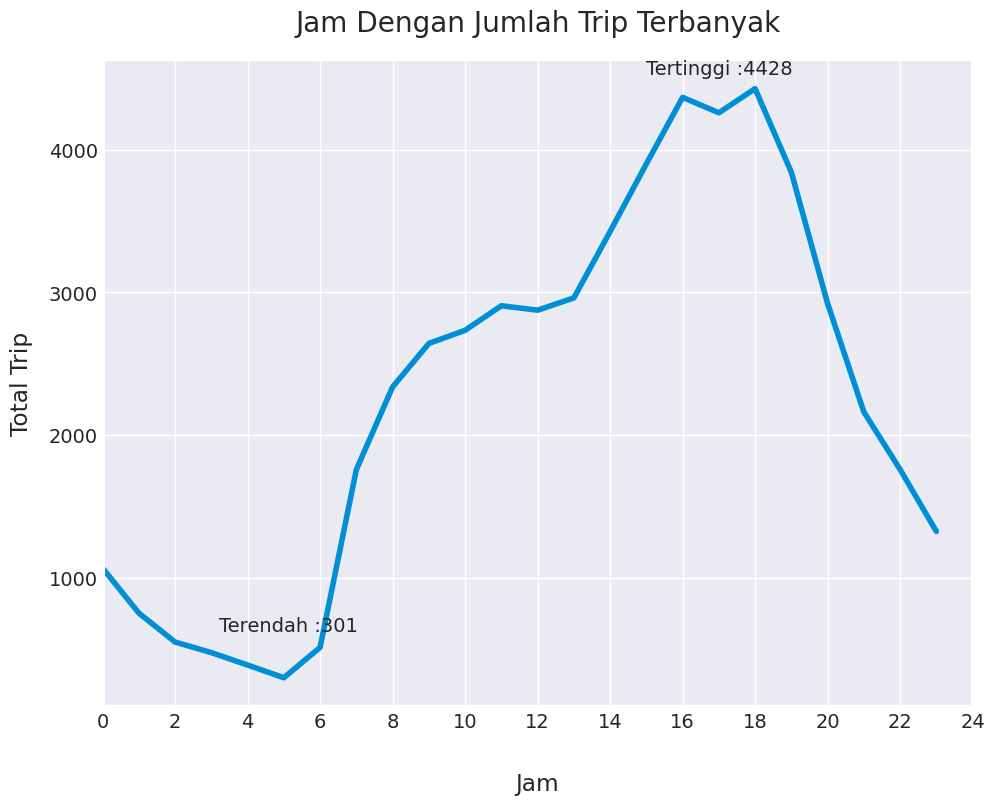

In [111]:
# Trend jam paling ramai

sns.set_style('darkgrid')
fig = plt.figure(figsize=(10,8))
plt.plot(df_jam['Hour'], df_jam['count'])

plt.title('Jam Dengan Jumlah Trip Terbanyak', pad = 20)
plt.xlabel('Jam', labelpad = 20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip', labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.xlim(0,24)
plt.xticks(range(0,25,2))

max_value = max(df_jam['count'])
min_value = min(df_jam['count'])

max_val = df_jam[df_jam['count'] == max_value]
min_val = df_jam[df_jam['count'] == min_value]

plt.annotate(f'Tertinggi :{max_value}',(max_val['Hour'],max_val['count']),
             xytext=(max_val['Hour']-3, max_val['count']+100))
plt.annotate(f'Terendah :{min_value}',(min_val['Hour'],min_val['count']),
             xytext=(min_val['Hour']-1.8, max_val['count']-3800))

plt.show()

Berdasarkan visualisasi diatas, **Jam dengan jumlah trip terbanyak dimulai dari jam 13.00 sampai 20.00**

VeriFone Inc. harus memaksimalkan jumlah unit taksi yang dimiliki ketika jam-jam tersebut. Selain itu, pada jam yang tidak terlalu ramai, jumlah unit dapat dikurangi.


In [112]:
from math import ceil

df['duration']=df['lpep_dropoff_datetime']-df['lpep_pickup_datetime']
df['duration'].head()

# Menghitung durasi dalam satuan menit
df['durationmenit']=df['duration'].apply(lambda x : ceil(x.total_seconds()/60))
df['durationmenit']

0        12
1        7 
2        7 
5        18
7        13
         ..
63882    8 
63883    11
63884    7 
63885    10
63886    10
Name: durationmenit, Length: 54672, dtype: int64

## Passanger Count Analysis

In [113]:
# Cek Jumlah penumpang dalam satu taksi

df_penumpang = df['passenger_count'].value_counts().reset_index().rename(columns = {'index':'passenger_count','passenger':'Count'})
df_penumpang['passenger_count'] = df_penumpang['passenger_count'].astype(int)
df_penumpang['passenger_count'] = df_penumpang['passenger_count'].astype(str)
df_penumpang

,passenger_count,passenger_count
0,1,46465
1,2,4257
2,5,1761
3,6,1049
4,3,779
5,4,329
6,0,24
7,7,4
8,9,2
9,8,2


## Income Analysis

In [115]:
# Pendapatan per Tahun

incomeyear = df.groupby(df['lpep_dropoff_datetime'].dt.year)['total_amount'].sum()
incomeyear

lpep_dropoff_datetime
2009    43.20     
2022    52.40     
2023    1161193.25
Name: total_amount, dtype: float64

In [116]:
# Pendapatan per Bulan

incomemonth = df.groupby(df['lpep_dropoff_datetime'].dt.month)['total_amount'].sum()
incomemonth

lpep_dropoff_datetime
1     1160925.59
2     310.86    
12    52.40     
Name: total_amount, dtype: float64

In [118]:
df2023amount = df[['lpep_dropoff_datetime','total_amount']][df['lpep_dropoff_datetime'].dt.year == 2023]
df2023amount

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
63882,2023-01-31 23:17:21,17.30
63883,2023-01-31 23:17:03,19.20
63884,2023-01-31 23:23:04,14.16
63885,2023-01-31 23:38:50,22.50


In [144]:
dfjanamount = df2023amount[df2023amount['lpep_dropoff_datetime'].dt.month == 1]
dfjanamount

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
63882,2023-01-31 23:17:21,17.30
63883,2023-01-31 23:17:03,19.20
63884,2023-01-31 23:23:04,14.16
63885,2023-01-31 23:38:50,22.50


In [145]:
# Pendapatan per Minggu
dfweek = dfjanamount[['lpep_dropoff_datetime','total_amount']]

dfweek['lpep_dropoff_datetime']= pd.to_datetime(dfweek['lpep_dropoff_datetime'])

incomeweek = dfweek.groupby(pd.Grouper(key='lpep_dropoff_datetime', freq= 'W-MON')).sum().reset_index()
incomeweek['lpep_dropoff_datetime'] = incomeweek['lpep_dropoff_datetime'].astype(str)
incomeweek

,lpep_dropoff_datetime,total_amount
0,2023-01-02,51483.72
1,2023-01-09,260190.50
2,2023-01-16,260546.01
3,2023-01-23,271799.21
4,2023-01-30,276942.30
5,2023-02-06,39920.65


In [146]:
incomeweek = incomeweek.iloc[1:5]

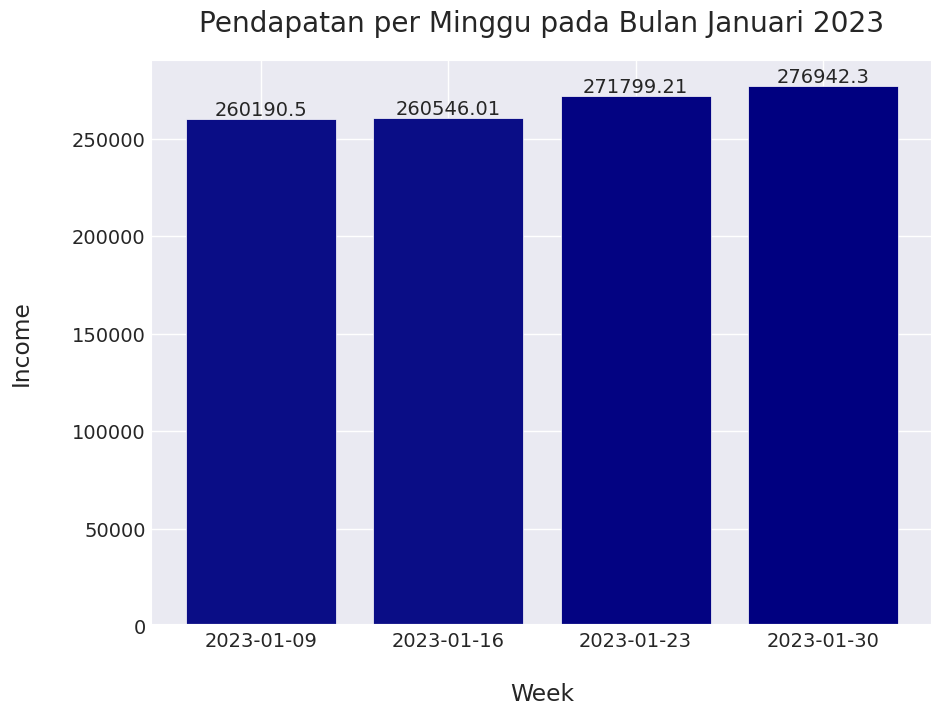

In [147]:
normalized_heights = np.array(incomeweek['total_amount']) / max(incomeweek['total_amount'])
color_start = 'lightblue'
color_end = 'navy'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize=(9,7))

plt.bar(incomeweek['lpep_dropoff_datetime'], incomeweek['total_amount'],color=cmap(normalized_heights))

plt.title('Pendapatan per Minggu pada Bulan Januari 2023', pad = 20)
plt.xlabel('Week', labelpad = 20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Income', labelpad=20)
plt.gca().yaxis.set_label_coords(-0.15, 0.5)


for i, value in enumerate(incomeweek['total_amount']):
  plt.text(i, value + 2000, str(value), ha='center')

plt.show()

Berdasarkan visualisasi diatas, **terdapat peningkatan income secara perlahan per minggu pada bulan Januari 2023**

# Conclusion & Recommendation

*   Terdapat 54.8% lokasi pick up yang tidak profitable
*   Lokasi pick up dengan ID 74 memiliki jumlah trip tertinggi sebesar 10565 trip
*   Terdapat 18 lokasi yang tidak profitable dimana hanya memiliki 1 kali trip
*   Jumlah trip Dipatch sangat sedikit, hanya sekitar 2.5% dari total trip
*   Hari Selasa merupakan hari yang memiliki jumlah trip tertinggi sebesar 8992 trip
*Mulai jam 12.00 sampai 20.00 terjadi peningkatan jumlah trip (jumlah trip paling ramai)
* Kebanyakan trip hanya diisi oleh 1 penumpang (sebanyak 46465 trip)
* Terdapat peningkatan income secara perlahan disetiap minggu pada bulan Januari 2023





Reccomendation :

*   Memaksimalkan pengadaan unit taksi di lokasi yg profitable khususnya lokasi dengan ID 74
*   Memaksimalkan pengadaan unit pada peak hour pukul 13.00 hingga 20.00 khususnya pada hari Selasa
*   Melakukan pengecekan unit dan fasilitas pendukung secara berkala seperti taximeter
*   Mengikuti perkembangan zaman dengan promosi tipe trip dispatch

